**Nama : Firlli Yuzia Rahmanu**

**NIM : 210411100163**

**Kelas : PSD A**


**DATA MATERNAL HEALTH RISK (risiko kesehatan ibu hamil)**

Data diambil dari https://archive.ics.uci.edu/dataset/863/maternal+health+risk

Deskripsi data : ancaman terhadap kesehatan ibu hamil atau calon ibu yang sedang mengandung. Hal ini sering digunakan dalam konteks perawatan prenatal dan kesehatan ibu hamil untuk memahami dan mengatasi risiko-risiko yang dapat memengaruhi kesehatan ibu dan perkembangan janin.


Tujuan Klasifikasi Data :
- Mengklasifikasikan individu berdasarkan karakteristik dan fitur-fitur tertentu dapat membantu dalam memprediksi tingkat risiko kesehatan ibu. Ini memungkinkan penyedia layanan kesehatan untuk lebih awal mengidentifikasi calon ibu yang mungkin menghadapi risiko kesehatan tertentu selama kehamilan.
- Dengan mengklasifikasikan calon ibu berdasarkan risiko, perawatan dan pemantauan yang lebih intensif dapat ditargetkan pada mereka yang memiliki risiko tinggi. Sebaliknya, mereka dengan risiko sedang (mid) dapat menerima perawatan yang cukup, mereka dengan risiko rendah dapat menerima perawatan yang lebih sederhana.

4 Model :
- Support Vector Machine
- Decision Tree
- Random Forest
- Gaussian Naive Bayes

Berikut Fitur yang ada di dalam Dataset :

- Age : Usia dalam tahun ketika seorang wanita sedang hamil.
- SystolicBP : Nilai atas Tekanan Darah dalam mmHg
- DiastolicBP : Nilai bawah Tekanan Darah dalam mmHg
- BS :	tingkat glukosa darah atau gula darah dalam bentuk konsentrasi molar, mmol/L.
- BodyTemp : Suhu Tubuh dalam Fahrenheit
- HeartRate	: Tingkat detak jantung istirahat normal dalam denyut per menit.
- RiskLevel : Tingkat Intensitas Risiko yang Diprediksi selama kehamilan

# - - -  **Connect To Google Drive** - - -


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/psd/Maternal_Health_Risk

/content/drive/MyDrive/psd/Maternal_Health_Risk


# - - -  **DATA PREP** - - -

In [ ]:
pip install dataprep

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 45.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.6/133.6 kB 14.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 52.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 56.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 75.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 764.0/764.0 kB 57.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 82.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 80.2 MB/s eta 0:00:00
  Created wheel for sqlalchemy: filename=SQLAlchemy-1.3.24-cp310-cp310-linux_x86_64.whl size=1252696 sha256=b82aa80b1

# - - -  **IMPORT LIBRARY** - - -

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

In [ ]:
df = pd.read_csv('Maternal_Health_Risk.csv')

In [ ]:
# memeriksa baris awal data
df.head()
df.shape

(1014, 7)

In [ ]:
# memeriksa baris akhir data
df.tail()
df.shape

(1014, 7)

In [ ]:
# mengakses tipe data dari setiap kolom dalam DataFrame.
df.dtypes

Age              int64
SystolicBP       int64
DiastolicBP      int64
BS             float64
BodyTemp       float64
HeartRate        int64
RiskLevel       object
dtype: object

In [ ]:
# jumlah baris dan jumlah kolom dalam DataFrame.
df.shape

(1014, 7)

In [ ]:
# jumlah nilai-nilai yang hilang (NaN atau null) dalam setiap kolom DataFrame.
df.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

tidak ada nilai yang hilang (NaN) dalam setiap kolom. Semua kolom memiliki nilai yang lengkap dan tidak ada yang perlu diimputasi atau diproses lebih lanjut terkait dengan data yang hilang.

In [ ]:
# untuk mengelompokkan kolom-kolom berdasarkan karakteristik tertentu
# seperti kolom-kolom kategori (ca_val) yang mungkin berisi variabel kategori atau tipe data terbatas, dan kolom-kolom kontinu (co_val) yang mungkin berisi variabel numerik atau tipe data beragam.
ca_val=[]
co_val=[]

for column in df.columns:
    if df[column].nunique() <=10:
        ca_val.append(column)
    else:
        co_val.append(column)

In [ ]:
#Categorical Data
ca_val

['BodyTemp', 'RiskLevel']

In [ ]:
df['BodyTemp'].unique()

array([ 98. , 100. , 102. , 101. , 103. ,  98.4,  99. ,  98.6])

In [ ]:
df['RiskLevel'].unique()

array(['high risk', 'low risk', 'mid risk'], dtype=object)

In [ ]:
co_val

['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'HeartRate']

In [ ]:
df['Age'].unique()

array([25, 35, 29, 30, 23, 32, 42, 19, 20, 48, 15, 50, 10, 40, 21, 18, 16,
       22, 49, 28, 12, 60, 55, 45, 31, 17, 26, 54, 44, 33, 13, 34, 38, 39,
       63, 14, 37, 51, 62, 43, 65, 66, 56, 70, 27, 36, 59, 24, 41, 46])

In [ ]:
df['SystolicBP'].unique()

array([130, 140,  90, 120,  85, 110,  70, 100,  75,  95,  76,  80, 115,
       135, 160, 129,  83,  99,  78])

In [ ]:
df['DiastolicBP'].unique()

array([ 80,  90,  70,  85,  60,  89,  75, 100,  50,  65,  95,  49,  63,
        69,  76,  68])

In [ ]:
df['BS'].unique()

array([15.  , 13.  ,  8.  ,  7.  ,  6.1 ,  7.01, 11.  ,  6.9 , 18.  ,
        6.7 ,  7.5 ,  7.2 ,  7.1 ,  6.4 ,  9.  ,  6.  ,  7.7 , 12.  ,
       16.  ,  7.8 ,  6.8 ,  7.9 , 17.  , 19.  , 10.  ,  6.3 ,  6.6 ,
        6.5 ,  7.6 ])

In [ ]:
df['HeartRate'].unique()

array([86, 70, 80, 76, 78, 77, 88, 90, 66, 82, 60, 75, 67, 65, 68,  7])

In [ ]:
# mengubah label menjadi nilai numerik
# tujuan nya untuk memudahkan menggunakan kolom 'RiskLevel' dalam analisis data atau pembuatan model
#RiskLevel = {'low risk':0,
        #'mid risk':1,
        #'high risk':2}


#df['RiskLevel'] = df['RiskLevel'].map(RiskLevel).astype(float)
#df

In [ ]:
# replacing values
df['RiskLevel'].replace(['low risk', 'mid risk','high risk'],[0, 1, 2], inplace=True)

df

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,2
1,35,140,90,13.0,98.0,70,2
2,29,90,70,8.0,100.0,80,2
3,30,140,85,7.0,98.0,70,2
4,35,120,60,6.1,98.0,76,0
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,2
1010,55,120,90,18.0,98.0,60,2
1011,35,85,60,19.0,98.0,86,2
1012,43,120,90,18.0,98.0,70,2


In [ ]:
# menampilkan jumlah kemunculan setiap nilai unik dalam kolom 'RiskLevel' dalam DataFrame
df['RiskLevel'].value_counts()

0    406
1    336
2    272
Name: RiskLevel, dtype: int64

In [ ]:
# statistik deskriptif ringkas dari kolom-kolom numerik dalam DataFrame df.
# Statistik deskriptif ini mencakup berbagai informasi seperti rata-rata, deviasi standar, nilai minimum, quartil, dan nilai maksimum.
df.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775,0.867850
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702,0.807353
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000,0.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000,0.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000,1.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000,2.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000,2.000000


menghitung korelasi antara dua kolom, dalam hal ini, 'RiskLevel' dan 'Age', dalam DataFrame df. Hasilnya adalah koefisien korelasi antara dua kolom tersebut, yang dapat mengindikasikan sejauh mana hubungan linear antara keduanya.

In [ ]:
df[['RiskLevel','Age']].corr()

,RiskLevel,Age
RiskLevel,1.000000,0.267225
Age,0.267225,1.000000


In [ ]:
df[['RiskLevel','SystolicBP']].corr()

,RiskLevel,SystolicBP
RiskLevel,1.000000,0.396473
SystolicBP,0.396473,1.000000


In [ ]:
df[['RiskLevel','DiastolicBP']].corr()

,RiskLevel,DiastolicBP
RiskLevel,1.000000,0.346649
DiastolicBP,0.346649,1.000000


In [ ]:
df[['RiskLevel','BS']].corr()

,RiskLevel,BS
RiskLevel,1.000000,0.569942
BS,0.569942,1.000000


In [ ]:
df[['RiskLevel','HeartRate']].corr()

,RiskLevel,HeartRate
RiskLevel,1.000000,0.194312
HeartRate,0.194312,1.000000


In [ ]:
# bagian dari library DataPrep, yang digunakan untuk eksplorasi data otomatis (EDA - Exploratory Data Analysis).
# mendapatkan hubungan antara variabel-variabel dalam data dan memahami korelasi antara mereka secara visual
from dataprep.eda import plot_correlation
plot_correlation(df)

# Pearson Correlation: Ini adalah metode yang mengukur korelasi linear antara dua variabel numerik. Nilai Pearson berkisar dari -1 hingga 1, dengan 1 menunjukkan korelasi positif sempurna, -1 menunjukkan korelasi negatif sempurna, dan 0 menunjukkan tidak ada korelasi. Statistik yang diberikan mencakup informasi tentang korelasi Pearson tertinggi positif, korelasi Pearson tertinggi negatif, korelasi Pearson terendah, dan rata-rata korelasi Pearson.
# Spearman Correlation: Ini adalah metode yang mengukur korelasi monotik antara dua variabel, yang berarti bahwa hubungan tidak harus bersifat linear. Nilai Spearman berkisar dari -1 hingga 1, dengan interpretasi yang mirip dengan Pearson. Statistik yang Anda berikan mencakup informasi tentang korelasi Spearman tertinggi positif, korelasi Spearman tertinggi negatif, korelasi Spearman terendah, dan rata-rata korelasi Spearman.
# Kendall's Tau Correlation: Ini adalah metode yang digunakan untuk mengukur korelasi antara dua variabel yang bersifat ordinal. Nilai KendallTau berkisar dari -1 hingga 1, dengan interpretasi yang mirip dengan Pearson dan Spearman. Statistik yang Anda berikan mencakup informasi tentang korelasi KendallTau tertinggi positif, korelasi KendallTau tertinggi negatif, korelasi KendallTau terendah, dan rata-rata korelasi KendallTau.

Output hidden; open in https://colab.research.google.com to view.

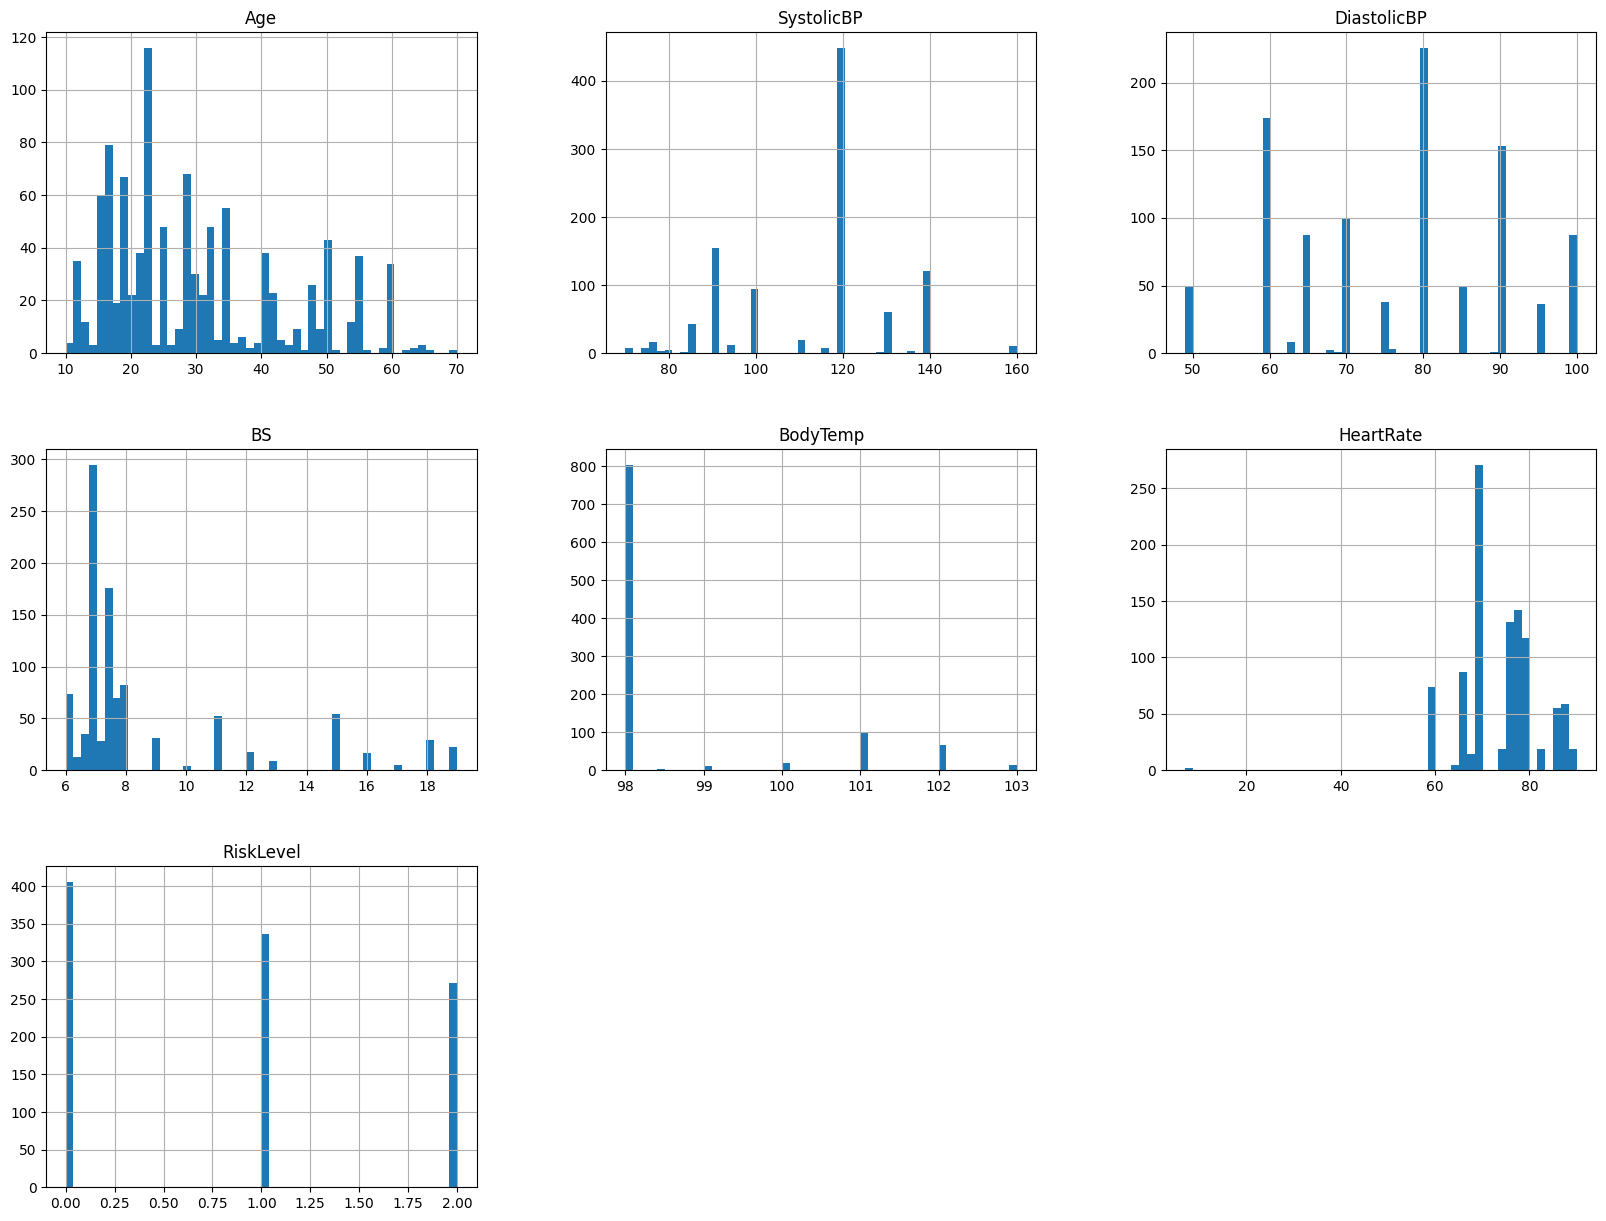

In [ ]:
# histogram
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20, 15))
plt.show()

<Axes: xlabel='RiskLevel', ylabel='count'>

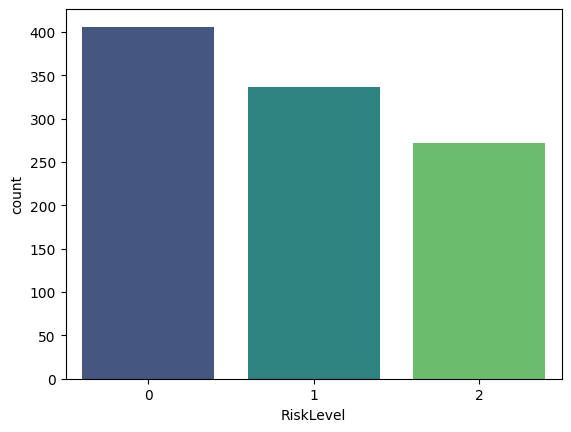

In [ ]:
# analisis dan visualisasi distribusi kategori pada kolom 'RiskLevel' dalam DataFrame
# memvisualisasikan distribusi dan jumlah kategori risiko('low risk', 'mid risk', 'high risk')

df['RiskLevel'].value_counts() * 100 / len(df)


sns.countplot(x='RiskLevel', data=df, palette='viridis')

In [ ]:
# membagi dataset
X=df[df.columns[:-1]]
y=df['RiskLevel']
X.shape

(1014, 6)

In [ ]:
X.head(5)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
0,25,130,80,15.0,98.0,86
1,35,140,90,13.0,98.0,70
2,29,90,70,8.0,100.0,80
3,30,140,85,7.0,98.0,70
4,35,120,60,6.1,98.0,76


In [ ]:
y.head(2)

0    2
1    2
Name: RiskLevel, dtype: int64

In [ ]:
X.shape

(1014, 6)

In [ ]:
#Split Dataset
# Nilai test_size adalah 0.3, membagi dataset menjadi data pelatihan (70%) dan data pengujian (30%).
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
y_test
X_train.shape


(709, 6)

In [ ]:
print(f'Training Shape x:',X_train.shape)
print(f'Testing Shape x:',X_test.shape)
print('*****___________*****___________*****')
print(f'Training Shape y:',X.shape)
print(f'Testing Shape y:',y.shape)

Training Shape x: (709, 6)
Testing Shape x: (305, 6)
*****___________*****___________*****
Training Shape y: (1014, 6)
Testing Shape y: (1014,)


# PREPROCESSING
pada data berikut adalah :
- normalisasi


**NORMALISASI**

normalisasi yang digunakan adalah Z-Score dengan rumus $$fragX-\mu (rumusnya pakai lateg)

Rumus Normalisasi Z-Score:

\[ Z = $$frag{X - \mu}{\sigma} \]

\[
Z = \frac{{X - \mu}}{{\sigma}}
\]

- \(Z\) adalah skor Z (Z-score).
- \(X\) adalah nilai yang akan dinormalisasi.
- \(\mu\) adalah rerata (mean) dari sampel.
- \(\sigma\) adalah deviasi standar (standard deviation) dari sampel.




rumus (1)
ada hitungan manual pakai excel


In [ ]:
# StandardScaler
# Normalisasi Zscore
from sklearn.preprocessing import StandardScaler
from pickle import dump
ss = StandardScaler()
ss.fit(X_train)
X_train_scaled = ss.transform(X_train)
ss_X_train = ss.fit_transform(X_train)
ss_X_test = ss.fit_transform(X_test)

In [ ]:
from google.colab import files
df_normalized = pd.DataFrame(data=ss_X_train, columns=X_train.columns)  # Ganti X_train.columns sesuai dengan kolom yang sesuai

# Simpan DataFrame ke dalam file CSV
df_normalized.to_csv('hasil_sudah_normalisasi.csv', index=False)

# Unduh file CSV
files.download('hasil_sudah_normalisasi.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Simpan model dengan file pickle
import pickle
file = '/content/drive/MyDrive/psd/Maternal_Health_Risk/normalisasi_ini.pkl'

with open(file, 'wb') as file:
    pickle.dump(ss, file)

In [ ]:
#SVM
from sklearn.svm import SVC

#Create svm
svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
svm.fit(X_train, y_train)
print("Train accuracy:",svm.score(X_train,y_train))
print("Test accuracy:",svm.score(X_test,y_test))

y_pred = svm.predict(X_test)
print(y_pred)
cm = confusion_matrix(y_test, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test, y_pred)* 100 ,'%')
print(classification_report(y_test, svm.predict(X_test)))

Train accuracy: 0.846262341325811
Test accuracy: 0.7180327868852459
[1 2 2 0 1 1 1 1 1 2 2 0 0 2 1 1 2 0 0 1 1 1 1 2 0 1 2 1 0 0 1 2 0 0 0 2 2
 1 0 2 0 1 2 2 0 1 2 1 0 0 0 0 0 0 1 1 2 0 0 0 0 1 1 1 1 2 1 2 1 1 2 0 0 1
 0 2 0 1 2 0 0 0 0 0 1 0 0 1 2 1 0 2 0 2 1 0 1 0 2 1 0 2 0 0 0 1 0 0 0 1 1
 1 0 2 1 0 0 2 0 2 1 0 0 1 2 2 1 0 1 0 0 0 1 1 0 0 2 1 0 1 2 0 2 2 0 0 2 1
 0 1 0 0 0 1 2 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 2 0 1 1 0 2 1 0 0 0 2 1 0 0 2
 0 2 0 0 0 1 0 1 1 0 0 1 2 0 0 1 1 2 2 1 0 1 2 1 1 2 1 0 0 0 2 1 0 0 0 2 2
 1 0 0 1 1 0 2 0 0 0 1 0 1 1 0 0 1 2 0 0 0 0 1 2 0 0 0 0 2 0 1 0 2 0 0 2 2
 0 0 1 0 0 1 2 1 0 2 1 0 2 0 1 2 0 0 0 0 0 0 2 0 2 1 0 2 0 1 1 0 1 0 0 0 2
 2 0 1 0 2 2 1 2 0]
CM: [[96 18  3]
 [39 65  8]
 [10  8 58]]
Accuracy: 71.80327868852459 %
              precision    recall  f1-score   support

           0       0.66      0.82      0.73       117
           1       0.71      0.58      0.64       112
           2       0.84      0.76      0.80        76

    accuracy           

In [ ]:
#Decision Tree
from sklearn import tree
decision_tree = tree.DecisionTreeClassifier(criterion='gini')
decision_tree.fit(X_train, y_train)

print("Train accuracy:",decision_tree.score(X_train,y_train))
print("Test accuracy:",decision_tree.score(X_test,y_test))

y_pred = decision_tree.predict(X_test)
print(y_pred)
cm = confusion_matrix(y_test, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test, y_pred)* 100 ,'%')
print(classification_report(y_test, decision_tree.predict(X_test)))

Train accuracy: 0.9464033850493653
Test accuracy: 0.8
[1 2 2 0 0 1 1 1 1 0 2 1 1 2 1 1 2 0 0 1 1 1 2 2 0 1 2 0 0 0 1 2 0 1 0 2 2
 0 0 2 2 0 2 2 0 1 2 1 0 0 1 0 0 1 1 1 2 0 0 1 0 1 1 0 0 2 1 2 1 2 2 2 1 1
 1 2 0 1 2 0 0 1 0 0 1 0 0 1 2 1 1 2 0 2 1 0 1 0 2 1 0 2 0 0 1 1 0 1 0 1 1
 1 0 2 1 0 0 2 1 2 1 0 0 1 2 2 1 1 1 1 0 0 1 1 0 0 2 1 0 1 2 1 2 2 0 0 2 0
 0 1 0 1 0 1 2 1 0 1 0 2 0 0 0 1 0 1 1 1 0 0 2 0 1 0 1 2 1 1 0 0 2 1 0 2 2
 0 2 0 1 0 1 1 1 1 0 1 1 2 0 1 1 1 2 2 1 1 1 2 1 1 2 1 0 0 1 2 1 2 0 0 2 2
 1 1 1 1 1 0 2 1 0 1 1 0 1 1 0 0 1 2 0 0 0 0 1 2 0 0 0 0 2 2 2 1 2 0 0 2 2
 2 1 1 1 1 1 2 1 1 2 0 2 2 0 1 2 2 0 0 2 0 1 0 0 2 2 1 2 0 1 1 2 1 0 0 0 2
 2 0 1 0 2 2 1 2 1]
CM: [[88 25  4]
 [16 87  9]
 [ 1  6 69]]
Accuracy: 80.0 %
              precision    recall  f1-score   support

           0       0.84      0.75      0.79       117
           1       0.74      0.78      0.76       112
           2       0.84      0.91      0.87        76

    accuracy                           0.80       

In [ ]:
#RandomForest
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

print("Train accuracy:",random_forest.score(X_train,y_train))
print("Test accuracy:",random_forest.score(X_test,y_test))

y_pred = random_forest.predict(X_test)
print(y_pred)
cm = confusion_matrix(y_test, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test, y_pred)* 100 ,'%')
print(classification_report(y_test, random_forest.predict(X_test)))

Train accuracy: 0.9464033850493653
Test accuracy: 0.7967213114754098
[1 2 2 0 0 1 1 1 1 0 2 1 1 2 1 1 2 0 0 1 1 1 2 2 0 1 2 1 0 0 1 2 0 1 0 2 2
 1 0 2 2 0 2 2 0 1 2 1 0 0 1 0 1 1 1 1 2 0 0 1 0 1 1 1 0 2 1 2 1 2 2 2 1 1
 1 2 0 1 2 0 0 0 0 1 1 0 0 1 2 1 1 2 0 2 1 0 1 0 2 1 0 2 0 0 1 1 0 1 0 1 1
 1 0 2 1 0 0 2 0 2 1 0 0 1 2 2 1 1 1 1 0 0 1 1 0 0 2 1 0 1 2 1 2 2 0 0 2 0
 0 1 0 1 0 1 2 1 0 1 0 2 0 0 0 1 0 1 1 0 0 0 2 0 1 0 1 2 1 0 0 0 2 1 0 2 2
 0 2 0 0 0 1 1 1 1 0 0 1 2 0 1 1 1 2 2 1 1 1 2 1 1 2 1 0 0 1 2 1 2 0 0 2 2
 1 1 1 1 1 0 2 1 0 1 1 0 1 1 0 0 1 2 0 0 0 0 1 2 0 0 0 0 2 2 2 1 2 0 0 2 2
 2 1 1 1 1 1 2 1 0 2 0 2 2 0 1 2 2 0 0 2 0 0 0 0 2 2 0 2 0 1 1 2 1 0 0 0 2
 2 0 1 0 2 2 1 2 1]
CM: [[89 24  4]
 [18 85  9]
 [ 2  5 69]]
Accuracy: 79.67213114754098 %
              precision    recall  f1-score   support

           0       0.82      0.76      0.79       117
           1       0.75      0.76      0.75       112
           2       0.84      0.91      0.87        76

    accuracy          

In [ ]:
# GaussianNB
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train , y_train)

print("Train accuracy:",nb.score(X_train,y_train))
print("Test accuracy:",nb.score(X_test,y_test))

y_pred = nb.predict(X_test)
print(y_pred)
cm = confusion_matrix(y_test, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test, y_pred)* 100 ,'%')
print(classification_report(y_test, nb.predict(X_test)))

Train accuracy: 0.61212976022567
Test accuracy: 0.5639344262295082
[0 2 2 0 1 1 0 1 0 0 2 0 0 0 1 0 0 0 0 0 0 1 0 2 0 0 2 0 0 0 1 2 0 0 0 2 2
 0 0 2 2 1 2 0 0 1 2 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 2 2 0 0 1 0 2 2 0
 0 2 0 2 2 0 0 0 0 0 0 0 0 1 2 0 1 1 0 0 0 0 1 0 2 0 0 1 0 0 0 0 0 1 0 0 1
 0 0 2 2 1 0 2 0 2 1 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0 2 1 0 2 0 0 2 0
 0 0 0 0 0 0 1 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 2 0 0 0 0 2 1 0 0 0 1 0 0 2 2
 0 2 0 0 0 0 0 1 0 0 0 0 2 0 0 0 0 0 1 0 0 0 2 0 0 2 0 0 0 0 1 0 0 0 0 2 2
 0 0 0 0 0 0 2 0 0 0 1 0 2 0 0 0 1 0 0 0 0 0 1 2 0 0 0 0 0 2 0 0 0 0 0 2 2
 2 0 0 0 0 0 2 0 0 1 0 0 1 0 0 2 0 0 0 2 0 0 0 0 2 1 0 2 0 2 0 1 0 0 0 0 2
 2 0 0 0 2 0 0 2 0]
CM: [[109   5   3]
 [ 85  17  10]
 [ 19  11  46]]
Accuracy: 56.393442622950815 %
              precision    recall  f1-score   support

           0       0.51      0.93      0.66       117
           1       0.52      0.15      0.23       112
           2       0.78      0.61      0.68        76

    accuracy  

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

akurasi_terbaik = 0
k_terbaik = 0

for k in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    hasil_prediksi = model.predict(X_test)

    akurasi = accuracy_score(y_test, hasil_prediksi)
    print(f"k = {k}, Skor Akurasi: {akurasi}")

    if akurasi > akurasi_terbaik:
        akurasi_terbaik = akurasi
        k_terbaik = k

print(f"k Terbaik: {k_terbaik} dengan Skor Akurasi: {akurasi_terbaik}")

k = 1, Skor Akurasi: 0.7836065573770492
k = 2, Skor Akurasi: 0.6852459016393443
k = 3, Skor Akurasi: 0.6688524590163935
k = 4, Skor Akurasi: 0.6262295081967213
k = 5, Skor Akurasi: 0.6
k = 6, Skor Akurasi: 0.6
k = 7, Skor Akurasi: 0.6295081967213115
k = 8, Skor Akurasi: 0.6065573770491803
k = 9, Skor Akurasi: 0.580327868852459
k = 10, Skor Akurasi: 0.6098360655737705
k = 11, Skor Akurasi: 0.6098360655737705
k = 12, Skor Akurasi: 0.6163934426229508
k = 13, Skor Akurasi: 0.6131147540983607
k = 14, Skor Akurasi: 0.6032786885245902
k = 15, Skor Akurasi: 0.5967213114754099
k = 16, Skor Akurasi: 0.6065573770491803
k = 17, Skor Akurasi: 0.6098360655737705
k = 18, Skor Akurasi: 0.6098360655737705
k = 19, Skor Akurasi: 0.5967213114754099
k = 20, Skor Akurasi: 0.5967213114754099
k Terbaik: 1 dengan Skor Akurasi: 0.7836065573770492


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy Score:",accuracy_score(y_test,y_pred))

Accuracy Score: 0.6327868852459017


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pickle

akurasi_terbaik_rf = 0
random_state_terbaik_rf = 0
model_terbaik = None

for random_state_rf in range(1, 21):
    model2 = RandomForestClassifier(random_state=random_state_rf)
    model2.fit(X_train, y_train)
    hasil_prediksi_rf = model2.predict(X_test)

    akurasi_rf = accuracy_score(y_test, hasil_prediksi_rf)
    print(f"random_state = {random_state_rf}, Skor Akurasi: {akurasi_rf}")

    if akurasi_rf > akurasi_terbaik_rf:
        akurasi_terbaik_rf = akurasi_rf
        random_state_terbaik_rf = random_state_rf
        model_terbaik = model2  # Simpan model dengan akurasi tertinggi

print(f"random_state Terbaik: {random_state_terbaik_rf} dengan Skor Akurasi: {akurasi_terbaik_rf}")

# Simpan model dengan akurasi tertinggi ke dalam file
with open('best_model.pkl', 'wb') as file:
    pickle.dump(model_terbaik, file)

random_state = 1, Skor Akurasi: 0.8065573770491803
random_state = 2, Skor Akurasi: 0.7967213114754098
random_state = 3, Skor Akurasi: 0.8065573770491803
random_state = 4, Skor Akurasi: 0.8098360655737705
random_state = 5, Skor Akurasi: 0.8098360655737705
random_state = 6, Skor Akurasi: 0.7934426229508197
random_state = 7, Skor Akurasi: 0.8032786885245902
random_state = 8, Skor Akurasi: 0.8032786885245902
random_state = 9, Skor Akurasi: 0.7967213114754098
random_state = 10, Skor Akurasi: 0.8
random_state = 11, Skor Akurasi: 0.7967213114754098
random_state = 12, Skor Akurasi: 0.7967213114754098
random_state = 13, Skor Akurasi: 0.7901639344262295
random_state = 14, Skor Akurasi: 0.8032786885245902
random_state = 15, Skor Akurasi: 0.8
random_state = 16, Skor Akurasi: 0.7967213114754098
random_state = 17, Skor Akurasi: 0.8098360655737705
random_state = 18, Skor Akurasi: 0.8098360655737705
random_state = 19, Skor Akurasi: 0.7901639344262295
random_state = 20, Skor Akurasi: 0.8065573770491803

In [ ]:
pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.4/159.4 kB 11.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 32.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 40.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 13.6 MB/

In [ ]:
# membagi dataset
X=df[df.columns[:-1]]
y=df['RiskLevel']
X.shape

(1014, 6)

In [ ]:
!pip install --upgrade scipy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 23.5 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
pycaret 3.1.0 requires scipy~=1.10.1, but you have scipy 1.11.3 which is incompatible.


In [ ]:
# import classification module
from pycaret.classification import *

# init setup
clf1 = setup(df, target='RiskLevel')  # Use 'target' em vez de 'y'

# return best model
best = compare_models()

# return best model based on Recall
best = compare_models(sort='Recall')  # default is 'Accuracy'

# compare specific models
best_specific = compare_models(whitelist=['dt', 'rf', 'xgboost'])

# blacklist certain models
best_specific = compare_models(blacklist=['catboost', 'svm'])

# return top 3 models based on Accuracy
top3 = compare_models(n_select=3)


,Description,Value
0,Session id,3339
1,Target,RiskLevel
2,Target type,Multiclass
3,Original data shape,"(1014, 7)"
4,Transformed data shape,"(1014, 7)"
5,Transformed train set shape,"(709, 7)"
6,Transformed test set shape,"(305, 7)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7983,0.9224,0.7983,0.8072,0.7989,0.6942,0.6974,0.5720
et,Extra Trees Classifier,0.7969,0.9177,0.7969,0.8029,0.7966,0.6917,0.6945,0.2940
lightgbm,Light Gradient Boosting Machine,0.7941,0.9207,0.7941,0.8021,0.7942,0.6874,0.6906,0.8730
xgboost,Extreme Gradient Boosting,0.7898,0.9236,0.7898,0.7965,0.7900,0.6812,0.6840,0.1120
dt,Decision Tree Classifier,0.7743,0.8673,0.7743,0.7840,0.7761,0.6582,0.6608,0.0850
gbc,Gradient Boosting Classifier,0.7743,0.9060,0.7743,0.7788,0.7733,0.6561,0.6593,1.1320
knn,K Neighbors Classifier,0.6671,0.8261,0.6671,0.6756,0.6624,0.4890,0.4957,0.0930
ridge,Ridge Classifier,0.6403,0.0000,0.6403,0.6386,0.6199,0.4433,0.4598,0.0750
qda,Quadratic Discriminant Analysis,0.6403,0.8027,0.6403,0.6496,0.6221,0.4415,0.4608,0.0740
lr,Logistic Regression,0.6375,0.7884,0.6375,0.6341,0.6258,0.4420,0.4503,1.5320


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7983,0.9224,0.7983,0.8072,0.7989,0.6942,0.6974,0.2330
et,Extra Trees Classifier,0.7969,0.9177,0.7969,0.8029,0.7966,0.6917,0.6945,0.3490
lightgbm,Light Gradient Boosting Machine,0.7941,0.9207,0.7941,0.8021,0.7942,0.6874,0.6906,0.4230
xgboost,Extreme Gradient Boosting,0.7898,0.9236,0.7898,0.7965,0.7900,0.6812,0.6840,0.1420
dt,Decision Tree Classifier,0.7743,0.8673,0.7743,0.7840,0.7761,0.6582,0.6608,0.0270
gbc,Gradient Boosting Classifier,0.7743,0.9060,0.7743,0.7788,0.7733,0.6561,0.6593,0.5710
knn,K Neighbors Classifier,0.6671,0.8261,0.6671,0.6756,0.6624,0.4890,0.4957,0.0440
ridge,Ridge Classifier,0.6403,0.0000,0.6403,0.6386,0.6199,0.4433,0.4598,0.0260
qda,Quadratic Discriminant Analysis,0.6403,0.8027,0.6403,0.6496,0.6221,0.4415,0.4608,0.0270
lr,Logistic Regression,0.6375,0.7884,0.6375,0.6341,0.6258,0.4420,0.4503,0.3640


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

TypeError: ignored

In [ ]:
# import classification module
from pycaret.classification import *

# init setup
clf1 = setup(df, target='RiskLevel')

# create specific models
models_to_compare = ['dt', 'rf', 'xgboost']
models = [create_model(model) for model in models_to_compare]

# compare specific models
compare_models(models)


,Description,Value
0,Session id,5582
1,Target,RiskLevel
2,Target type,Multiclass
3,Original data shape,"(1014, 7)"
4,Transformed data shape,"(1014, 7)"
5,Transformed train set shape,"(709, 7)"
6,Transformed test set shape,"(305, 7)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8451,0.9256,0.8451,0.8477,0.8455,0.7649,0.7658
1,0.7746,0.8534,0.7746,0.7778,0.7759,0.6564,0.6566
2,0.8028,0.8728,0.8028,0.8301,0.8058,0.7004,0.7108
3,0.7887,0.8938,0.7887,0.8192,0.7885,0.6845,0.6976
4,0.8592,0.8972,0.8592,0.8613,0.8586,0.7872,0.7889
5,0.7746,0.8915,0.7746,0.7754,0.7748,0.6588,0.6590
6,0.8028,0.8578,0.8028,0.8007,0.7983,0.7016,0.7043
7,0.8169,0.8913,0.8169,0.8437,0.8197,0.7217,0.7323
8,0.8169,0.8967,0.8169,0.8161,0.8145,0.7200,0.7216


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8732,0.9527,0.8732,0.8732,0.8732,0.8069,0.8069
1,0.7746,0.8967,0.7746,0.7735,0.7739,0.6562,0.6564
2,0.7746,0.9316,0.7746,0.8204,0.7792,0.6595,0.6785
3,0.8169,0.9552,0.8169,0.8235,0.8157,0.7243,0.7285
4,0.8873,0.9627,0.8873,0.8865,0.8866,0.8294,0.8296
5,0.7746,0.9128,0.7746,0.7746,0.7746,0.6578,0.6578
6,0.8451,0.9173,0.8451,0.8434,0.8425,0.7645,0.7662
7,0.8310,0.9426,0.8310,0.8396,0.8310,0.7435,0.7478
8,0.8310,0.9285,0.8310,0.8306,0.8305,0.7427,0.7429


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8451,0.9489,0.8451,0.8477,0.8455,0.7649,0.7658
1,0.7887,0.8816,0.7887,0.7887,0.7887,0.6782,0.6782
2,0.7746,0.9229,0.7746,0.8204,0.7792,0.6595,0.6785
3,0.8310,0.9572,0.8310,0.8313,0.8292,0.7440,0.7456
4,0.8592,0.9562,0.8592,0.8578,0.8582,0.7867,0.7870
5,0.7887,0.9132,0.7887,0.7873,0.7877,0.6797,0.6799
6,0.8169,0.9277,0.8169,0.8126,0.8123,0.7232,0.7252
7,0.8310,0.9600,0.8310,0.8395,0.8307,0.7428,0.7471
8,0.7746,0.9113,0.7746,0.7756,0.7741,0.6568,0.6576


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
1,Random Forest Classifier,0.8123,0.9277,0.8123,0.8194,0.8120,0.7144,0.7183,0.6320
0,Decision Tree Classifier,0.8025,0.8821,0.8025,0.8121,0.8021,0.7001,0.7048,0.0830
2,Extreme Gradient Boosting,0.8024,0.9253,0.8024,0.8090,0.8018,0.6995,0.7033,0.3320


Processing:   0%|          | 0/17 [00:00<?, ?it/s]

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=5582, verbose=0, warm_start=False)

Model dengan akurasi terbaik adalah Decision Tree

In [ ]:
# Simpan model dengan file pickle
import pickle
file = '/content/drive/MyDrive/psd/Maternal_Health_Risk/model_decisiontree_ini.pkl'

with open(file, 'wb') as file:
    pickle.dump(decision_tree, file)